In [8]:
from gravipy.tensorial import Coordinates, MetricTensor, Christoffel, Ricci, Einstein, All
from sympy import symbols, Function, diag, sin, simplify, init_printing
import sympy as sp

## Here we need consider the curvature k as function of time, $k = k(t)$ in FLRW metric. 

In [10]:
t,r,theta,phi,a,k = symbols('t,r,\\theta,\\phi,a,k')
x = Coordinates('\chi',[t,r,theta,phi])
a=Function('a')(t)
k=Function('k')(t)
Metric = diag(1,-((a)**2/(1-k*r**2)),-(a**2)*r**2,-(a**2)*(r*sin(theta))**2)
g=MetricTensor('g',x,Metric)

### Using the Einstein field equation:
$$

G_{\mu \nu} = R_{\mu \nu} -\frac{1}{2}R g_{\mu \nu } = \frac {8 \pi G}{c^4} T_{\mu \nu},\,\,\,\,   (1)
$$
where $R_{\mu \nu}$ is the Ricci tensor and $R$ the Ricci scalar. Also, in the right hand side, $T_{\mu \nu}$, is the energy-momentum tensor, given as
$$
T_{\mu \nu} = \rm{diag}{(\rho,-p,-p,-p)}
$$
with $\rho $ the energy density and $p$ the preassure. 


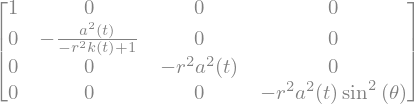

In [11]:
g(All,All)

### Firstly, we calculate the Christoffel symbols due to the Ricci tensor is given as 
$$
R_{\mu \nu} = \Gamma_{\mu \nu, \lambda}^{\lambda} - \Gamma_{\mu \lambda,\nu}^\lambda + \Gamma_{\mu \nu}^\alpha \Gamma_{\alpha \beta }^\beta - \Gamma_{\mu \alpha}^{\beta} \Gamma_{\nu \beta}^{\alpha},
$$

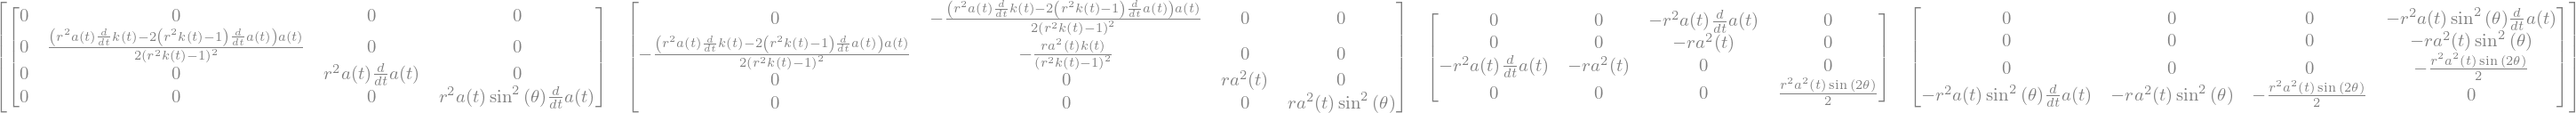

In [12]:
Ga = Christoffel('Ga',g)
Ga(All,All,All)

### Now, we can calculate the Ricci tensor 

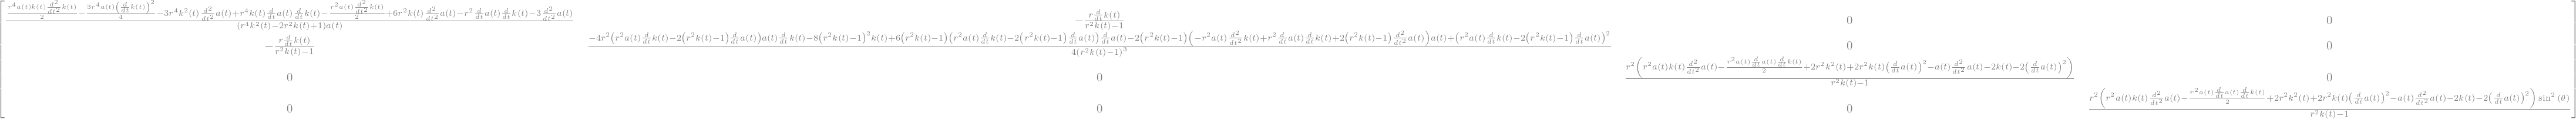

In [13]:
Ri=Ricci('Ri',g)
Ri(All,All)

### And the Ricci scalar is $R = g^{\mu \nu} R_{\mu \nu}$, por lo que

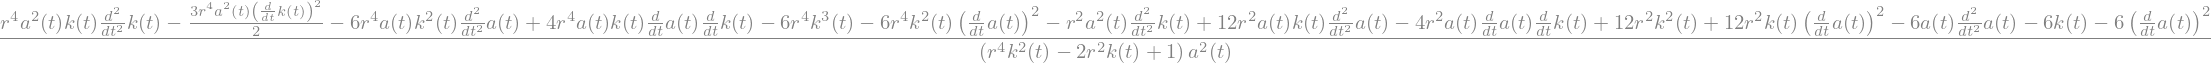

In [14]:
Ri.scalar()

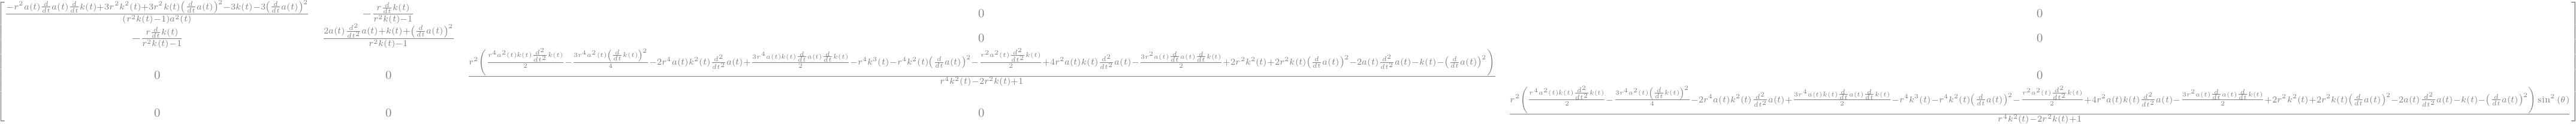

In [15]:
G=Einstein('G',Ri)
G(All,All)
simplify(G(All,All))

### From the above results, we can comparate directly with the right side of eq. (1) and due to $G_{\mu \nu } \propto T_{\mu \nu}$, we notice that 

$$

\frac{d}{dt} k = T_{0,1} = T_{1,0} = 0,
$$
### for this reason, for a ideal fluid, the curvature always is constant (time). 